<font size=6><b>lec06. 이진분류 - 평가 메트릭스


* ref : https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?select=diabetes.csv

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

import warnings
warnings.filterwarnings(action='ignore')

# Data Load

In [121]:
df = pd.read_csv("./datasets/diabetes.csv")
df.rename(columns={"Outcome" : "target"},  inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   target                    768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# from sklearn.datasets import load_diabetes
# dataset = load_diabetes()
# print( dataset.keys() )
# # -----------------------------------------
# df = pd.DataFrame(dataset['data'], columns = dataset['feature_names'])
# df['target'] = dataset['target']
# df.head()

# 샘플링(N개)
DataFrame.sample(n=None, frac=None, replace=False, weights=None, random_state=None, axis=None, ignore_index=False)

In [145]:
# df[df['target']==0].sample(n=3, random_state=1)
dfs = df.sample(frac=0.1, random_state=1, ignore_index=False)
print(dfs.shape)
dfs['target'].value_counts()

(77, 9)


0    48
1    29
Name: target, dtype: int64

# EDA

In [ ]:
# df.hist(figsize=(8,6))
# plt.tight_layout()
# plt.show()

In [ ]:
# sns.pairplot(data=df , hue='target')
# plt.show()

# 학습 & 평가

In [176]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, plot_roc_curve

## train test 분리

In [8]:
# y = df['target']
# X = df.drop(['target'],  axis=1)
# print(X.shape, y.shape)

(768, 8) (768,)


In [140]:
y = dfs['target']
X = dfs.drop(['target'],  axis=1)
print(X.shape, y.shape)

(77, 8) (77,)


In [9]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
#                                                     stratify=y, random_state=1111)
# X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((614, 8), (154, 8), (614,), (154,))

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    stratify=y, random_state=1111)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((61, 8), (16, 8), (61,), (16,))

In [10]:
# model = RandomForestClassifier(random_state=0)
# model.fit(X_train, y_train)
# pred  = model.predict(X_test)
# proba = model.predict_proba(X_test)
# print(pred[:5])
# print(proba[:5])

# accuracy = accuracy_score(y_test, pred)
# print(f"accuracy : {accuracy:.5f}")

[0 0 1 0 0]
[[0.87 0.13]
 [0.73 0.27]
 [0.33 0.67]
 [0.86 0.14]
 [0.55 0.45]]
accuracy : 0.75974


In [125]:
model_dtc = DecisionTreeClassifier()
model_dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [142]:
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)
pred  = model.predict(X_test)
proba = model.predict_proba(X_test)
df_var = model.decision_function(X_test)

print(pred[:5])
print(proba[:5])
print(df_var[:5])
# [-16.49590748  -0.36250441   2.74703316]
# 판별함수 : 판별 기준 출력
print(np.argmax(np.array([9.99999931e-01, 6.85359405e-08])))

accuracy = accuracy_score(y_test, pred)
print(f"accuracy : {accuracy:.5f}")

[0 1 0 1 0]
[[0.74404088 0.25595912]
 [0.48251542 0.51748458]
 [0.74812878 0.25187122]
 [0.23956864 0.76043136]
 [0.62313325 0.37686675]]
[-1.06707823  0.06996684 -1.08865722  1.15504588 -0.50286869]
0
accuracy : 0.56250


<pre>
[0 0 1]
[[9.99999931e-01 6.85359405e-08]
-01 : 소숫점 첫번째 , -08 : 소숫점 여덟번째
 [5.89646545e-01 4.10353455e-01]
 [6.02544252e-02 9.39745575e-01]]
accuracy : 0.33333



* 판별분석 : 어느 모집단에서 추출되었는지 분석 , 모수(평균, 분산)이용
    * 판별변수 : 판별하기 위한 변수, 독립 변수중 판별력이 높은 변수
    * 판별 함수 : 판별변수들의 선형조합, 회귀함수, Z = w1x1 + w2x2 + b 
      - 공분산 : 두 피쳐간의 상관관계, 선형성
    * 판별점수
    * 표본의 크기 : 표본의 크기는 독립변수의 개수보다 3배(최소 2배) 이상
    * 판별함수 >> PCA(주성분분석) 한다
* 판별함수
    * 기준값(threshold)>0 : 양성(Positive)
    * 기준값(threshold)<0 : 음성(negative)
    * 기준값(threshold)을 얼마로 설정하냐에 따라 성능평가 점수가 달라진다

In [ ]:
# proba_df = pd.DataFrame(proba)
# proba_df['pred'] = pred
# proba_df.head(5)

* np.vstack, np.hstack(np.column_stack)
* ref : https://stackoverflow.com/questions/33356442/when-should-i-use-hstack-vstack-vs-append-vs-concatenate-vs-column-stack

<img src= "https://i.stack.imgur.com/1QBr4.png" >

In [112]:
pd.DataFrame(np.vstack([y_test,  pred, proba[:,0], proba[:,1], df_var]).T,
            columns = ["y_test", "pred","proba0" ,"proba1" ," df_var"])

,y_test,pred,proba0,proba1,df_var
0,0.0,0.0,0.744041,0.255959,-1.067078
1,0.0,1.0,0.482515,0.517485,0.069967
2,1.0,0.0,0.748129,0.251871,-1.088657
3,1.0,1.0,0.239569,0.760431,1.155046
4,0.0,0.0,0.623133,0.376867,-0.502869
5,0.0,0.0,0.764830,0.235170,-1.179343
6,0.0,0.0,0.847070,0.152930,-1.711804
7,1.0,0.0,0.704013,0.295987,-0.866481
8,0.0,0.0,0.803307,0.196693,-1.407091
9,0.0,0.0,0.720728,0.279272,-0.948074


* LogisticRegression >> coef

In [152]:
model.coef_.reshape(-1)

array([ 0.13668293,  0.00777474, -0.02078411, -0.02164559,  0.00074357,
        0.04521887,  0.7109441 ,  0.02213694])

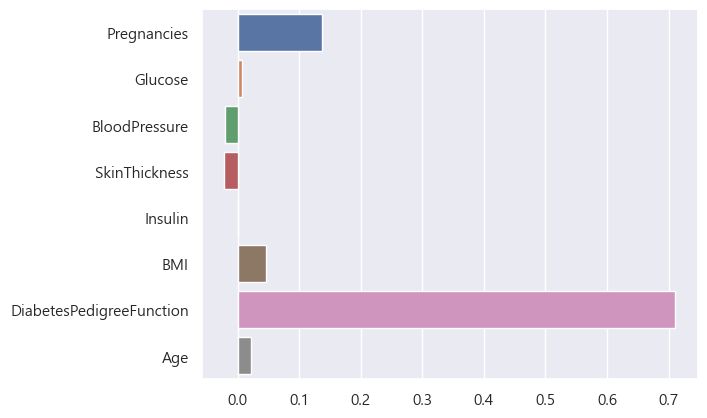

In [114]:
s = pd.Series(model.coef_[0], index = X_train.columns)
# s = pd.Series(model.coef_.reshape(-1), index = X_train.columns)
sns.barplot(x = s.values, y = s.index)
plt.show()


* DecisionTreeClassifier > feature_importances_

[0.         0.10391559 0.25562952 0.03489703 0.         0.09023877
 0.21686964 0.29844946]


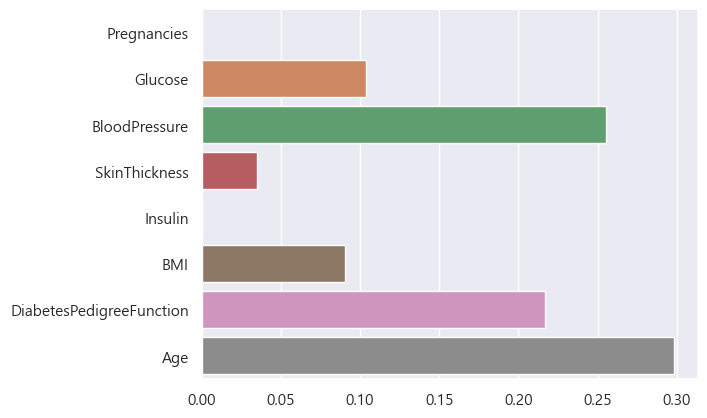

In [115]:
print(model_dtc.feature_importances_ )
dtcs = pd.Series(model_dtc.feature_importances_, index = X_train.columns)
sns.barplot(x = dtcs.values, y = dtcs.index)
plt.show()

## 피쳐 중요도 

[0.08831665 0.23572506 0.08945796 0.07089538 0.07409396 0.16186333
 0.13187488 0.14777279]


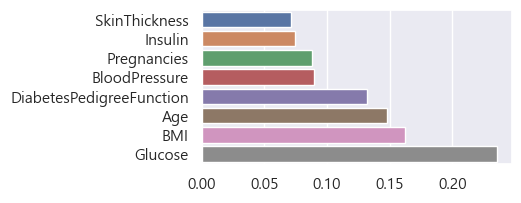

In [12]:
# print( model.feature_importances_ )
# plt.figure(figsize=(4,2))
# s = pd.Series(model.feature_importances_, index=X_train.columns).sort_values()
# sns.barplot(x=s.values, y=s.index)
# plt.show()

In [96]:
confusion_matrix(y_test, pred)
# FN : 21 >> 젤 중요한 부분!!!  >>  당뇨병이 맞는 데 아니라고 예측  >>  치명적인 오류

array([[1, 1],
       [1, 0]], dtype=int64)

# 평가 매트릭스

<img src="https://velog.velcdn.com/images%2Fhajeongjj%2Fpost%2F31affec5-a47b-4ff0-b07d-73943729dbc3%2Fimage.png">

<pre>
classification_report()
* <font color=red><b>accuracy
* <font color=red><b>f1, precision, recall (macro:산술평균,  micro:가중평균)
* <font color=red><b>roc_auc               (_ovr:멀티, _ovo:이진)
* <font color=red><b>neg_log_loss

In [117]:
cr = classification_report(y_test, pred)
print(cr)

              precision    recall  f1-score   support

           0       0.67      0.60      0.63        10
           1       0.43      0.50      0.46         6

    accuracy                           0.56        16
   macro avg       0.55      0.55      0.55        16
weighted avg       0.58      0.56      0.57        16



In [197]:
accuracy  = accuracy_score(y_test, pred)
f1        = f1_score(y_test, pred, average='binary')
precision = precision_score(y_test, pred, average='binary')
recall    = recall_score(y_test, pred, average='binary')
# roc_auc   = roc_auc_score(y_test, pred, average='macro', multi_class="ovr")
print(f"accuracy:{accuracy:.5f} f1:{f1:.5}  precision: {precision:.5}  recall:{recall:.5}")  #   roc_auc:{roc_auc:.5}")

cm = confusion_matrix(y_test, pred)
print(cm)
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

accuracy:0.56250 f1:0.46154  precision: 0.42857  recall:0.5
[[6 4]
 [3 3]]


# precision_recall_curve

sklearn.metrics.precision_recall_curve(y_true, probas_pred, *, pos_label=None, sample_weight=None)[source]¶

* proba 양성확률만 가지고 계산

In [130]:
proba_c1 = proba[:,1]
proba_c1[:5]

array([0.25595912, 0.51748458, 0.25187122, 0.76043136, 0.37686675])

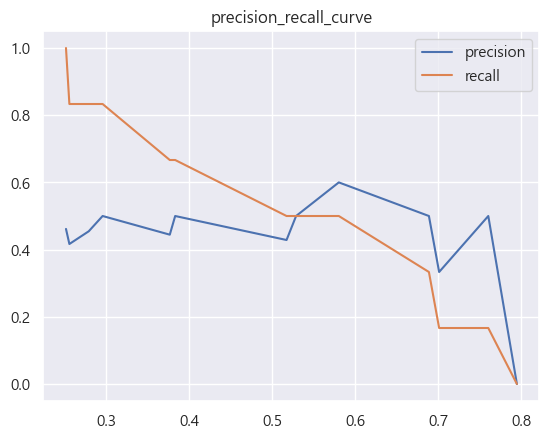

In [139]:
precision, recall, threshold = precision_recall_curve(y_test, proba_c1)
# Returns : precision, recall, threshold
precision.shape, recall.shape, threshold.shape
# threshold 보다 정밀도, 재현율은 1개씩 더 많다 >> 재현율, 정밀도에 임계치 0.5일때 값이 하나씩 더 있어서!!!
plt.plot(threshold ,
         precision[:len(threshold)], label="precision")
plt.plot(threshold ,
         recall[:len(threshold)], label="recall")
plt.legend()
plt.title("precision_recall_curve")
plt.show()

# 임계치 조정
<pre>
Binarizer : 임계치(threshold = 0.5)를 잡고 그 이하이면 0, 초과면 1
class sklearn.preprocessing.Binarizer(*, threshold=0.0, copy=True)[source]¶

In [146]:
from sklearn.preprocessing import Binarizer

In [154]:
arr = np.array([0.7, 0.3, 0.5])
brz=Binarizer(threshold = 0.5)
print ( brz.fit_transform(arr.reshape(1,-1)) )

brz=Binarizer(threshold = 0.2)
print ( brz.fit_transform(arr.reshape(1,-1)) )

brz=Binarizer(threshold = 0.8)
print ( brz.fit_transform(arr.reshape(1,-1)) )

[[1. 0. 0.]]
[[1. 1. 1.]]
[[0. 0. 0.]]


In [161]:
print(proba_c1)

brz=Binarizer(threshold = 0.5)
print ( brz.fit_transform(proba_c1.reshape(1,-1)) )

brz=Binarizer(threshold = 0.8)
print ( brz.fit_transform(proba_c1.reshape(1,-1)) )

[0.25595912 0.51748458 0.25187122 0.76043136 0.37686675 0.23517036
 0.1529299  0.29598703 0.19669331 0.27927228 0.79489054 0.58041982
 0.38335862 0.68893748 0.52898613 0.70123593]
[[0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
th_list = [0.51, 0.52, 0.57, 0.58,0.6]
for th in th_list:
    brz=Binarizer(threshold = th)
    th_pred =  brz.fit_transform( proba_c1.reshape(-1,1)  )
    print(th)
    print( confusion_matrix (y_test, th_pred)  )
    print( classification_report  (y_test, th_pred)  )
    print("--"*30)

# plot_precision_recall_curve

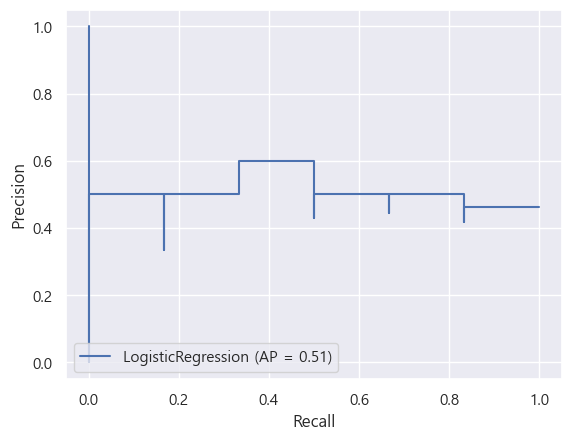

In [170]:
disp = plot_precision_recall_curve(model, X_test, y_test)
disp

# roc_curv()

## roc_auc_score
* AUC (Area Under the roc Curve) : roc 아래 면적 값
* sklearn.metrics.roc_auc_score(y_true, y_score, *, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)[source]

* roc_auc_score() 이용 점수확인

In [175]:
auc = roc_auc_score(y_test, proba_c1)
print(f"AUC 점수 : {auc : .5f}"  )

AUC 점수 :  0.65000


* roc_curve() 이용  점수확인
<pre>
sklearn.metrics.roc_curve(y_true, y_score, *, pos_label=None, sample_weight=None, drop_intermediate=True)
y_score : 양성만 

In [179]:
from sklearn import metrics

In [224]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, proba_c1)
auc_score = auc(fpr, tpr)
print(f"AUC 점수 : {auc_score : .5f}"  )


AUC 점수 :  0.65000 [0.  0.1 0.1 0.2 0.2 0.4 0.4 0.5 0.5 0.7 0.7 1. ]


## roc_curve
<pre>
sklearn.metrics.roc_curve(y_true, y_score, *, pos_label=None, sample_weight=None, drop_intermediate=True)
y_score : 양성만 

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, proba_c1)

In [221]:
cm
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

FPR = FP / (TN + FP)
TPR_recall =  TP / (FN +TP)
print(FPR, TPR_recall)




0.4 0.5


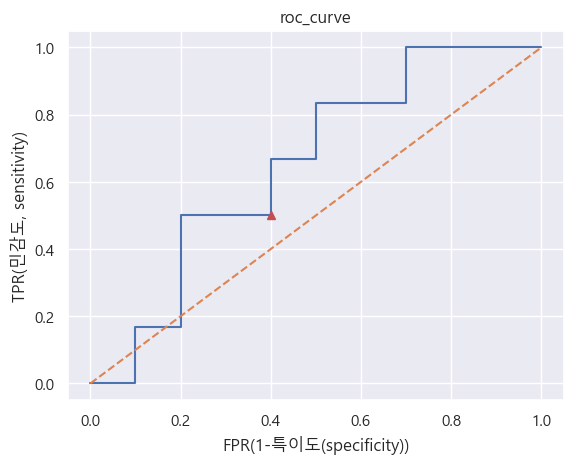

In [223]:
precision, recall, threshold = metrics.roc_curve(y_test, proba_c1)
# Returns : precision, recall, threshold
precision.shape, recall.shape, threshold.shape
# threshold 보다 정밀도, 재현율은 1개씩 더 많다 >> 재현율, 정밀도에 임계치 0.5일때 값이 하나씩 더 있어서!!!

plt.plot( precision,
         recall)
plt.plot([0,1],[0,1],"--")

plt.plot( FPR,  TPR_recall,  "r^")

plt.xlabel("FPR(1-특이도(specificity))")
plt.ylabel("TPR(민감도, sensitivity)")

plt.title("roc_curve")
plt.show()



# precision_recall_curve VS. roc_curve
<pre>
* X : 확률변수
* Y : 확률값
* 임계치(검은 세로선) 좌측에 가깝다 >> FPR, TPR  최대값
 - 임계치 최소화 >> 양성(P) 확률이 커진다
 - 임계치 0      >> 모든 값을 positive로 예측 >> TPR(100)
 
*  임계치(검은 세로선) 우측에 가깝다 >> FPR, TPR  최소값
 - 임계치 최대화 >> 음성(N) 확률이 커진다
 - 임계치 1      >> 모든 값을 negative로 예측 >> FPR(100)

<img src="https://blog.kakaocdn.net/dn/buhibz/btruXTZyiS2/zWnjxw6rYXNq9mqbA6sLY0/img.gif">

In [ ]:
<pre>
* 두 집단 분리 잘 됨 >> ROC커브 면적 최대화 >> AUC 점수최대화
* 두 집단 분리 안 됨 >> ROC커브 면적 최소화 >> AUC 점수최대소화

<img src="https://blog.kakaocdn.net/dn/bmtSzI/btru2wV4yw0/28T7KjpCoYo46X14FteAr1/img.gif">